<a href="https://colab.research.google.com/github/mfznakbr/kskadjk/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Muhammad%20Fauzani%20Akbar(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

1. dataset berasal dari kagle berikut adalah tautannya https://www.kaggle.com/datasets/wowevan/dataset-kesejahteraan-pekerja-indonesia?select=garisKemiskinan.csv
2. dataset ini tanpa labe, jumlah baris 5460
- kategorikal : provinsi, daerah, jenis, periode
- numerikal : gk, dan tahun

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# daftar library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler, RobustScaler, OrdinalEncoder
from sklearn.cluster import (KMeans, MiniBatchKMeans, AffinityPropagation, MeanShift, SpectralClustering,
                             AgglomerativeClustering, DBSCAN, OPTICS, Birch)
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import ward
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from IPython.display import clear_output
clear_output()

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
df = pd.read_csv('/content/garisKemiskinan.csv')
df

,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0
...,...,...,...,...,...,...
5455,INDONESIA,TOTAL,PERDESAAN,2022,SEPTEMBER,513170.0
5456,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2021,MARET,472525.0
5457,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2021,SEPTEMBER,486168.0
5458,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2022,MARET,505468.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

**1. Memahami Struktur Data**

In [ ]:
df.describe()

,tahun,gk
count,5460.000000,5261.000000
mean,2018.115385,303904.185516
std,2.577159,158176.024903
min,2013.000000,48561.000000
25%,2016.000000,144674.000000
50%,2018.000000,313294.000000
75%,2020.000000,410188.000000
max,2022.000000,872843.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB


**2. Missing Values**

In [ ]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
gk,199


In [ ]:
miss = missing_values[missing_values >= 100].index
miss

Index(['gk'], dtype='object')

In [ ]:
df = df.dropna(subset=['gk'])
missing_values = df.isnull().sum()
missing_values[missing_values > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5261 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5261 non-null   object 
 1   jenis     5261 non-null   object 
 2   daerah    5261 non-null   object 
 3   tahun     5261 non-null   int64  
 4   periode   5261 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 287.7+ KB


**3. Analisis Distribusi**

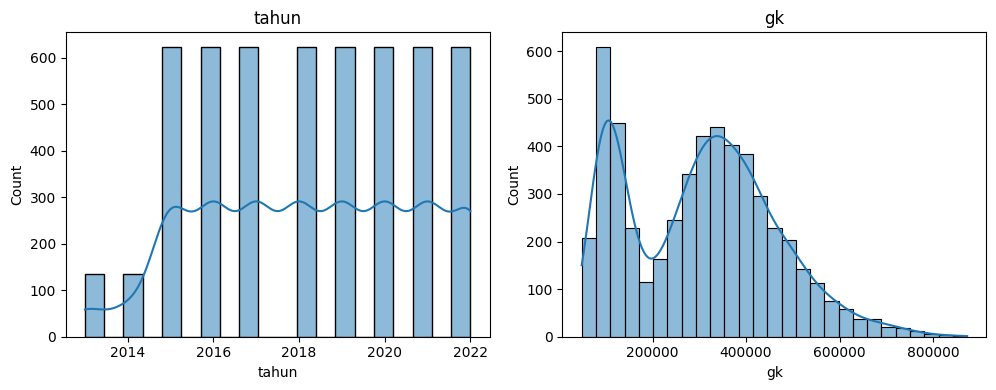

In [ ]:
kolom_nomor = df.select_dtypes(exclude=['object']).columns.tolist()
m = len(kolom_nomor)
width = 4

fig, axes = plt.subplots(int(np.ceil(m / width)), width, figsize=(5 * width, 4 * int(np.ceil(m / width))))
axes = axes.flatten()

for i, col in enumerate(kolom_nomor):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(col)

for j in range (i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

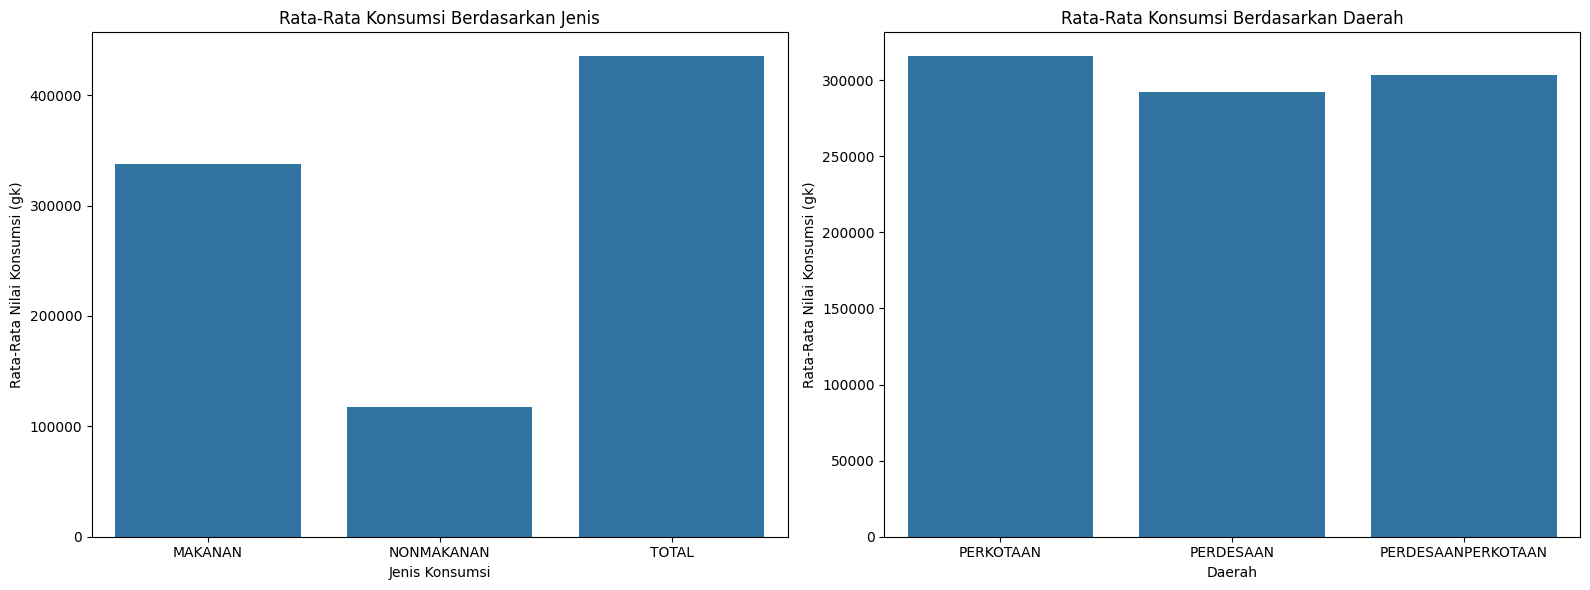

In [ ]:

# Membuat figure dengan 2 subplot (1 baris, 2 kolom)
plt.figure(figsize=(16, 6))

# Subplot 1: Distribusi berdasarkan jenis (Makanan vs. Non-Makanan)
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, subplot ke-1
# Barplot pertama
sns.barplot(data=new, x='jenis', y='gk', estimator='mean', errorbar=None)
plt.title('Rata-Rata Konsumsi Berdasarkan Jenis')
plt.xlabel('Jenis Konsumsi')
plt.ylabel('Rata-Rata Nilai Konsumsi (gk)')

# Subplot 2: Distribusi berdasarkan daerah (Perkotaan vs. Perdesaan)
plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, subplot ke-2
sns.barplot(data=new, x='daerah', y='gk', estimator='mean', errorbar=None)
plt.title('Rata-Rata Konsumsi Berdasarkan Daerah')
plt.xlabel('Daerah')
plt.ylabel('Rata-Rata Nilai Konsumsi (gk)')


plt.tight_layout()
plt.show()

**4. Visualisasi Data**

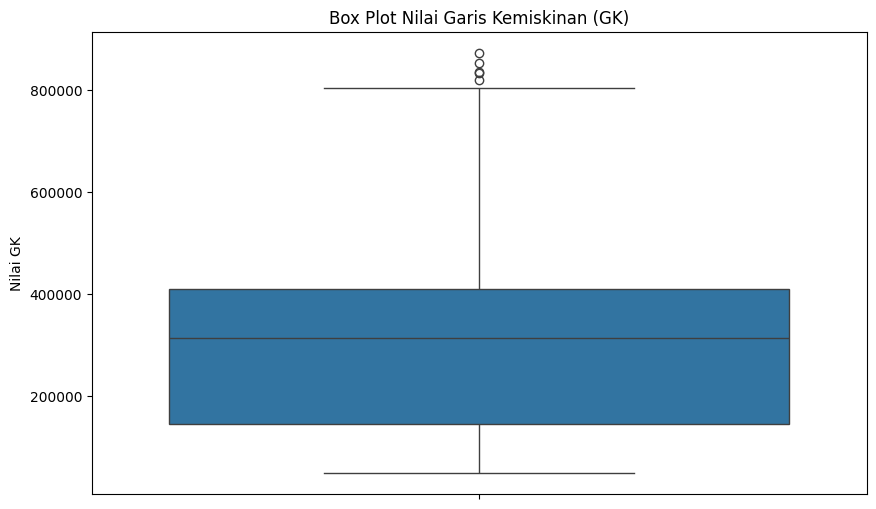

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=new['gk'])
plt.title('Box Plot Nilai Garis Kemiskinan (GK)')
plt.ylabel('Nilai GK')
plt.show()

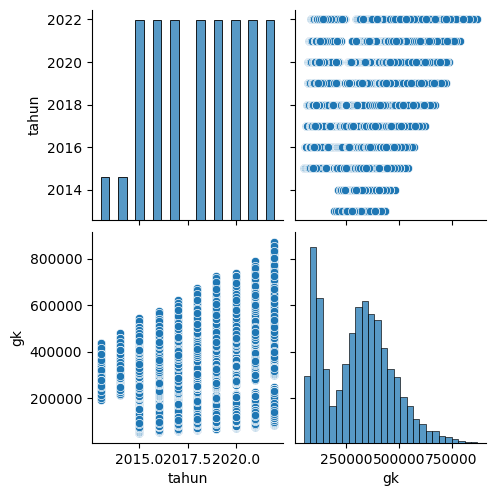

In [ ]:
# Pilih kolom numerik dari DataFrame
ko1_nomor = df.select_dtypes(include=['number'])
categorical_columns =  df.select_dtypes(include=['object'])

# Membuat pairplot untuk ko1 numerik
sns.pairplot(ko1_nomor)
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
for col in categorical_columns:
    print(f'{col} : {df[col].nunique()}')

provinsi : 35
jenis : 3
daerah : 3
periode : 2


In [ ]:
# Create a copy of the original dataframe
my_df = df.copy()

# Initialize encoders
le = LabelEncoder()
onhe = OneHotEncoder(sparse_output=False)

# Label Encoding for 'provinsi' and 'periode'
my_df['provinsi'] = le.fit_transform(my_df['provinsi'])
my_df['periode'] = le.fit_transform(my_df['periode'])

# One-Hot Encoding for categorical columns
categorical_cols = ['daerah', 'jenis']
ohe_data = onhe.fit_transform(my_df[categorical_cols])
ohe_columns = onhe.get_feature_names_out(categorical_cols)

# Create DataFrame from encoded data and concatenate
my_df = pd.concat([
    my_df.drop(columns=categorical_cols),
    pd.DataFrame(ohe_data, columns=ohe_columns, index=my_df.index)
], axis=1)

# Display info
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5261 entries, 0 to 5459
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   provinsi                   5261 non-null   int64  
 1   tahun                      5261 non-null   int64  
 2   periode                    5261 non-null   int64  
 3   gk                         5261 non-null   float64
 4   daerah_PERDESAAN           5261 non-null   float64
 5   daerah_PERDESAANPERKOTAAN  5261 non-null   float64
 6   daerah_PERKOTAAN           5261 non-null   float64
 7   jenis_MAKANAN              5261 non-null   float64
 8   jenis_NONMAKANAN           5261 non-null   float64
 9   jenis_TOTAL                5261 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 452.1 KB


In [ ]:
display(my_df.duplicated().sum(), my_df.isnull().sum())

np.int64(0)

,0
provinsi,0
tahun,0
periode,0
gk,0
daerah_PERDESAAN,0
daerah_PERDESAANPERKOTAAN,0
daerah_PERKOTAAN,0
jenis_MAKANAN,0
jenis_NONMAKANAN,0
jenis_TOTAL,0


In [ ]:
correlation_matrix = my_df.corr()
correlation_matrix

,provinsi,tahun,periode,gk,daerah_PERDESAAN,daerah_PERDESAANPERKOTAAN,daerah_PERKOTAAN,jenis_MAKANAN,jenis_NONMAKANAN,jenis_TOTAL
provinsi,1.000000,-0.000419,-0.000228,-0.027946,0.016284,-0.008003,-0.008325,-0.000166,-0.000166,0.000321
tahun,-0.000419,1.000000,-0.000400,0.232568,-0.034592,0.070305,-0.034588,0.069814,0.069814,-0.134682
periode,-0.000228,-0.000400,1.000000,0.033482,0.000268,-0.000130,-0.000138,-0.000129,-0.000129,0.000249
gk,-0.027946,0.232568,0.033482,1.000000,-0.053758,-0.000702,0.054076,0.144441,-0.800626,0.632945
daerah_PERDESAAN,0.016284,-0.034592,0.000268,-0.053758,1.000000,-0.486675,-0.515881,-0.012337,-0.012337,0.023801
daerah_PERDESAANPERKOTAAN,-0.008003,0.070305,-0.000130,-0.000702,-0.486675,1.000000,-0.497297,0.025104,0.025104,-0.048429
daerah_PERKOTAAN,-0.008325,-0.034588,-0.000138,0.054076,-0.515881,-0.497297,1.000000,-0.012365,-0.012365,0.023854
jenis_MAKANAN,-0.000166,0.069814,-0.000129,0.144441,-0.012337,0.025104,-0.012365,1.000000,-0.462608,-0.518359
jenis_NONMAKANAN,-0.000166,0.069814,-0.000129,-0.800626,-0.012337,0.025104,-0.012365,-0.462608,1.000000,-0.518359
jenis_TOTAL,0.000321,-0.134682,0.000249,0.632945,0.023801,-0.048429,0.023854,-0.518359,-0.518359,1.000000


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

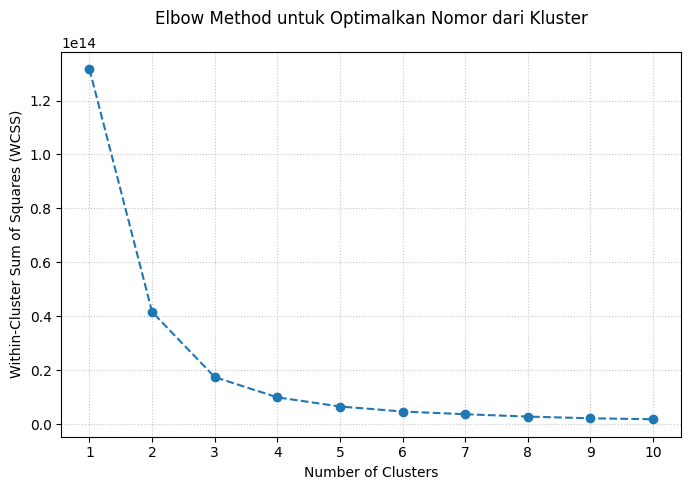

In [ ]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares
cluster_range = range(1, 11)  # Testing cluster numbers from 1 to 10

for i in range(1, 11):  # Menguji jumlah cluster 1 hingga 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(my_df)  # Menyesuaikan model dengan data yang distandarisasi
    wcss.append(kmeans.inertia_)  # Menyimpan WCSS untuk tiap jumlah cluster


# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method untuk Optimalkan Nomor dari Kluster', pad=20)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(cluster_range)
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()


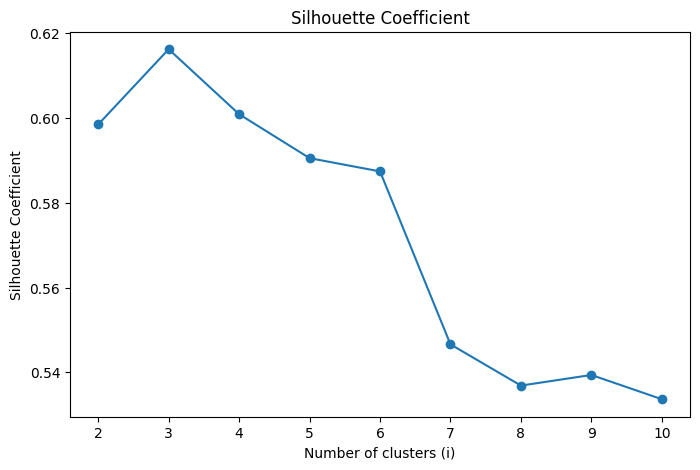

In [ ]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(my_df)
    silhouette_scores.append(silhouette_score(my_df, kmeans.labels_))

# Menampilkan Silhouette Coefficient
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (i)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient')
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(my_df)

silhouette_score(my_df, kmeans.labels_)

np.float64(0.616262139546082)

**EVALUASI TAMBAHAN**


---


**0.61** Merupakan grade yang cukup baik, artinya belum mencapai baik **0.70**. untuk mengoptimalkan hasil dari silhouette score menjadi 0.70 bahkan lebih saya akan melakukan feature selection.

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(my_df)

silhouette_score(my_df, kmeans.labels_)

np.float64(0.5985023523156189)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
my_df_cleaned = my_df.drop(['provinsi', 'tahun', 'periode'], axis=1)

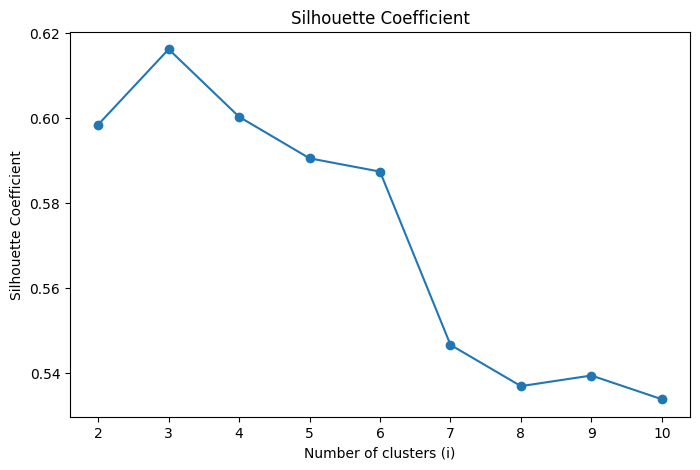

['gk', 'daerah_PERDESAAN', 'daerah_PERDESAANPERKOTAAN', 'daerah_PERKOTAAN', 'jenis_MAKANAN', 'jenis_NONMAKANAN', 'jenis_TOTAL']


In [ ]:
numeric_features = my_df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(my_df_cleaned[numeric_features])
    silhouette_scores.append(silhouette_score(my_df_cleaned[numeric_features], kmeans.labels_))

# Menampilkan Silhouette Coefficient
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (i)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient')
plt.show()

print(numeric_features)

In [ ]:
ss = StandardScaler()
mm = MinMaxScaler()
rs = RobustScaler()
df_ss =my_df_cleaned.copy()
df_mm =my_df_cleaned.copy()
df_rs =my_df_cleaned.copy()

df_ss[numeric_features] = ss.fit_transform(df_ss[numeric_features])
df_mm[numeric_features] = mm.fit_transform(df_mm[numeric_features])
df_rs[numeric_features] = rs.fit_transform(df_rs[numeric_features])

**Standart Scaller**

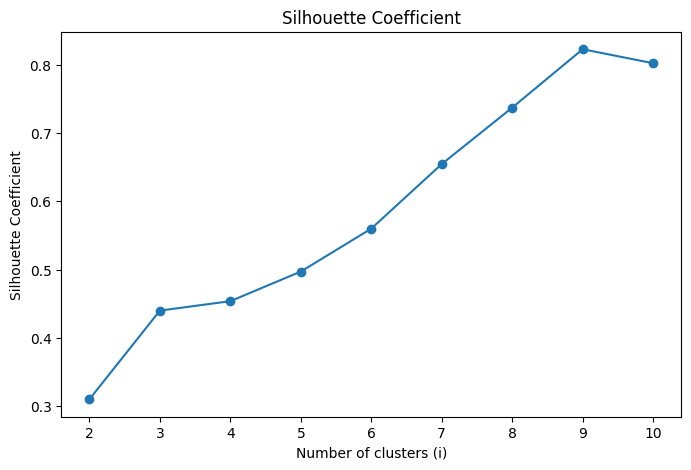

In [ ]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_ss)
    silhouette_scores.append(silhouette_score(df_ss, kmeans.labels_))

# Menampilkan Silhouette Coefficient
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (i)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient')
plt.show()

**MinMaxScaler**

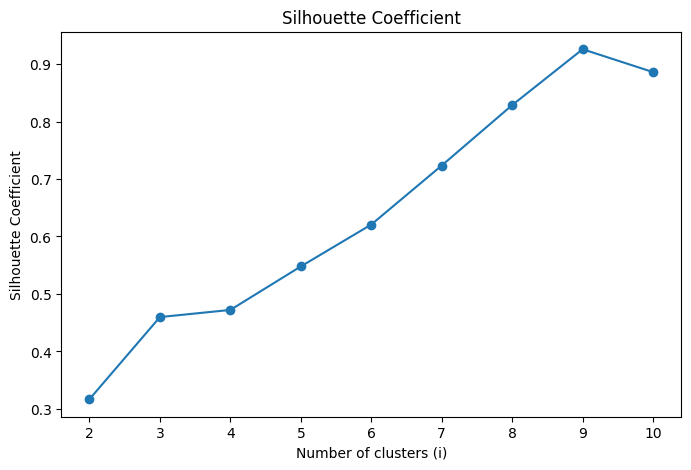

In [ ]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_mm)
    silhouette_scores.append(silhouette_score(df_mm, kmeans.labels_))

# Menampilkan Silhouette Coefficient
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (i)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient')
plt.show()

**ROBUSTSCALER**

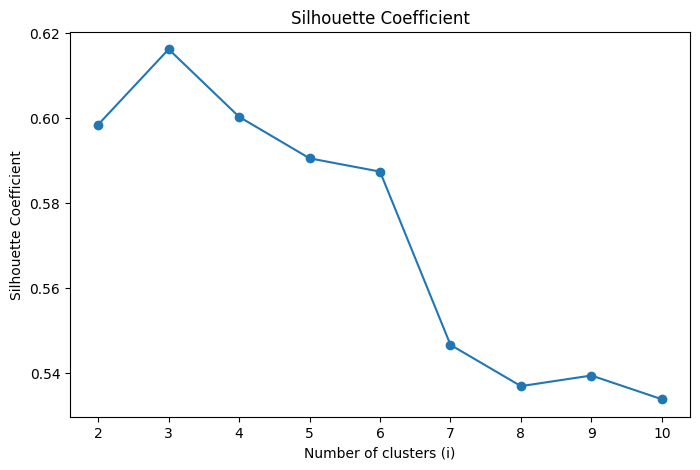

In [ ]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(my_df_cleaned)
    silhouette_scores.append(silhouette_score(my_df_cleaned, kmeans.labels_))

# Menampilkan Silhouette Coefficient
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (i)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient')
plt.show()

**Evaluasi Sebelum dan Setelah Feature Selection**

In [ ]:
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(df_mm)
df_mm['Cluster'] = kmeans.labels_

silhouette_score(df_mm, kmeans.labels_)

np.float64(0.9464601907121448)

Sebelum melakukan feature selection, score dari silhouette hanya berkisar **0.60**. Setelah melakukan feature selection dengan membuang beberapa feature, hasil dari silhouette mencapai angka **0.94** tentunya itu adalah angka yg sangat baik dengan jumlah cluster adalah 9. bahkan ini jauh diatas 0.70 dari yang ditargetkan.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

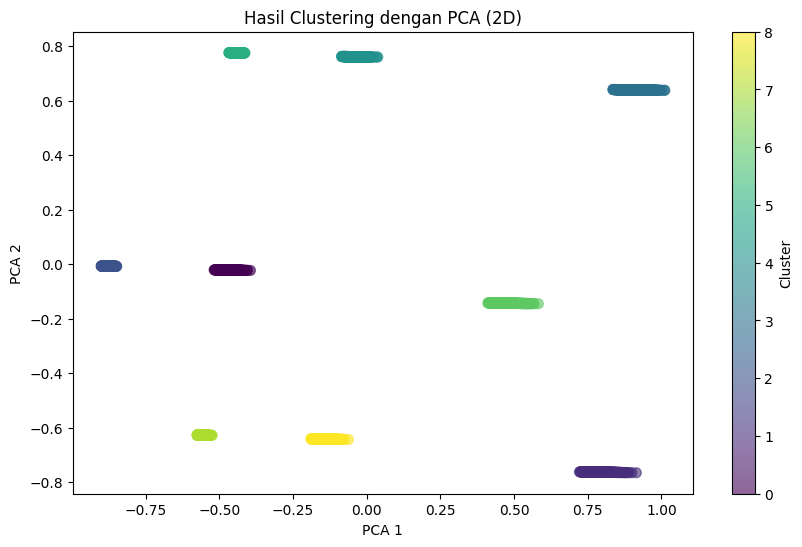

In [ ]:
# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_mm.drop(columns=['Cluster']))

# Visualisasi scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_mm['Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.title('Hasil Clustering dengan PCA (2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

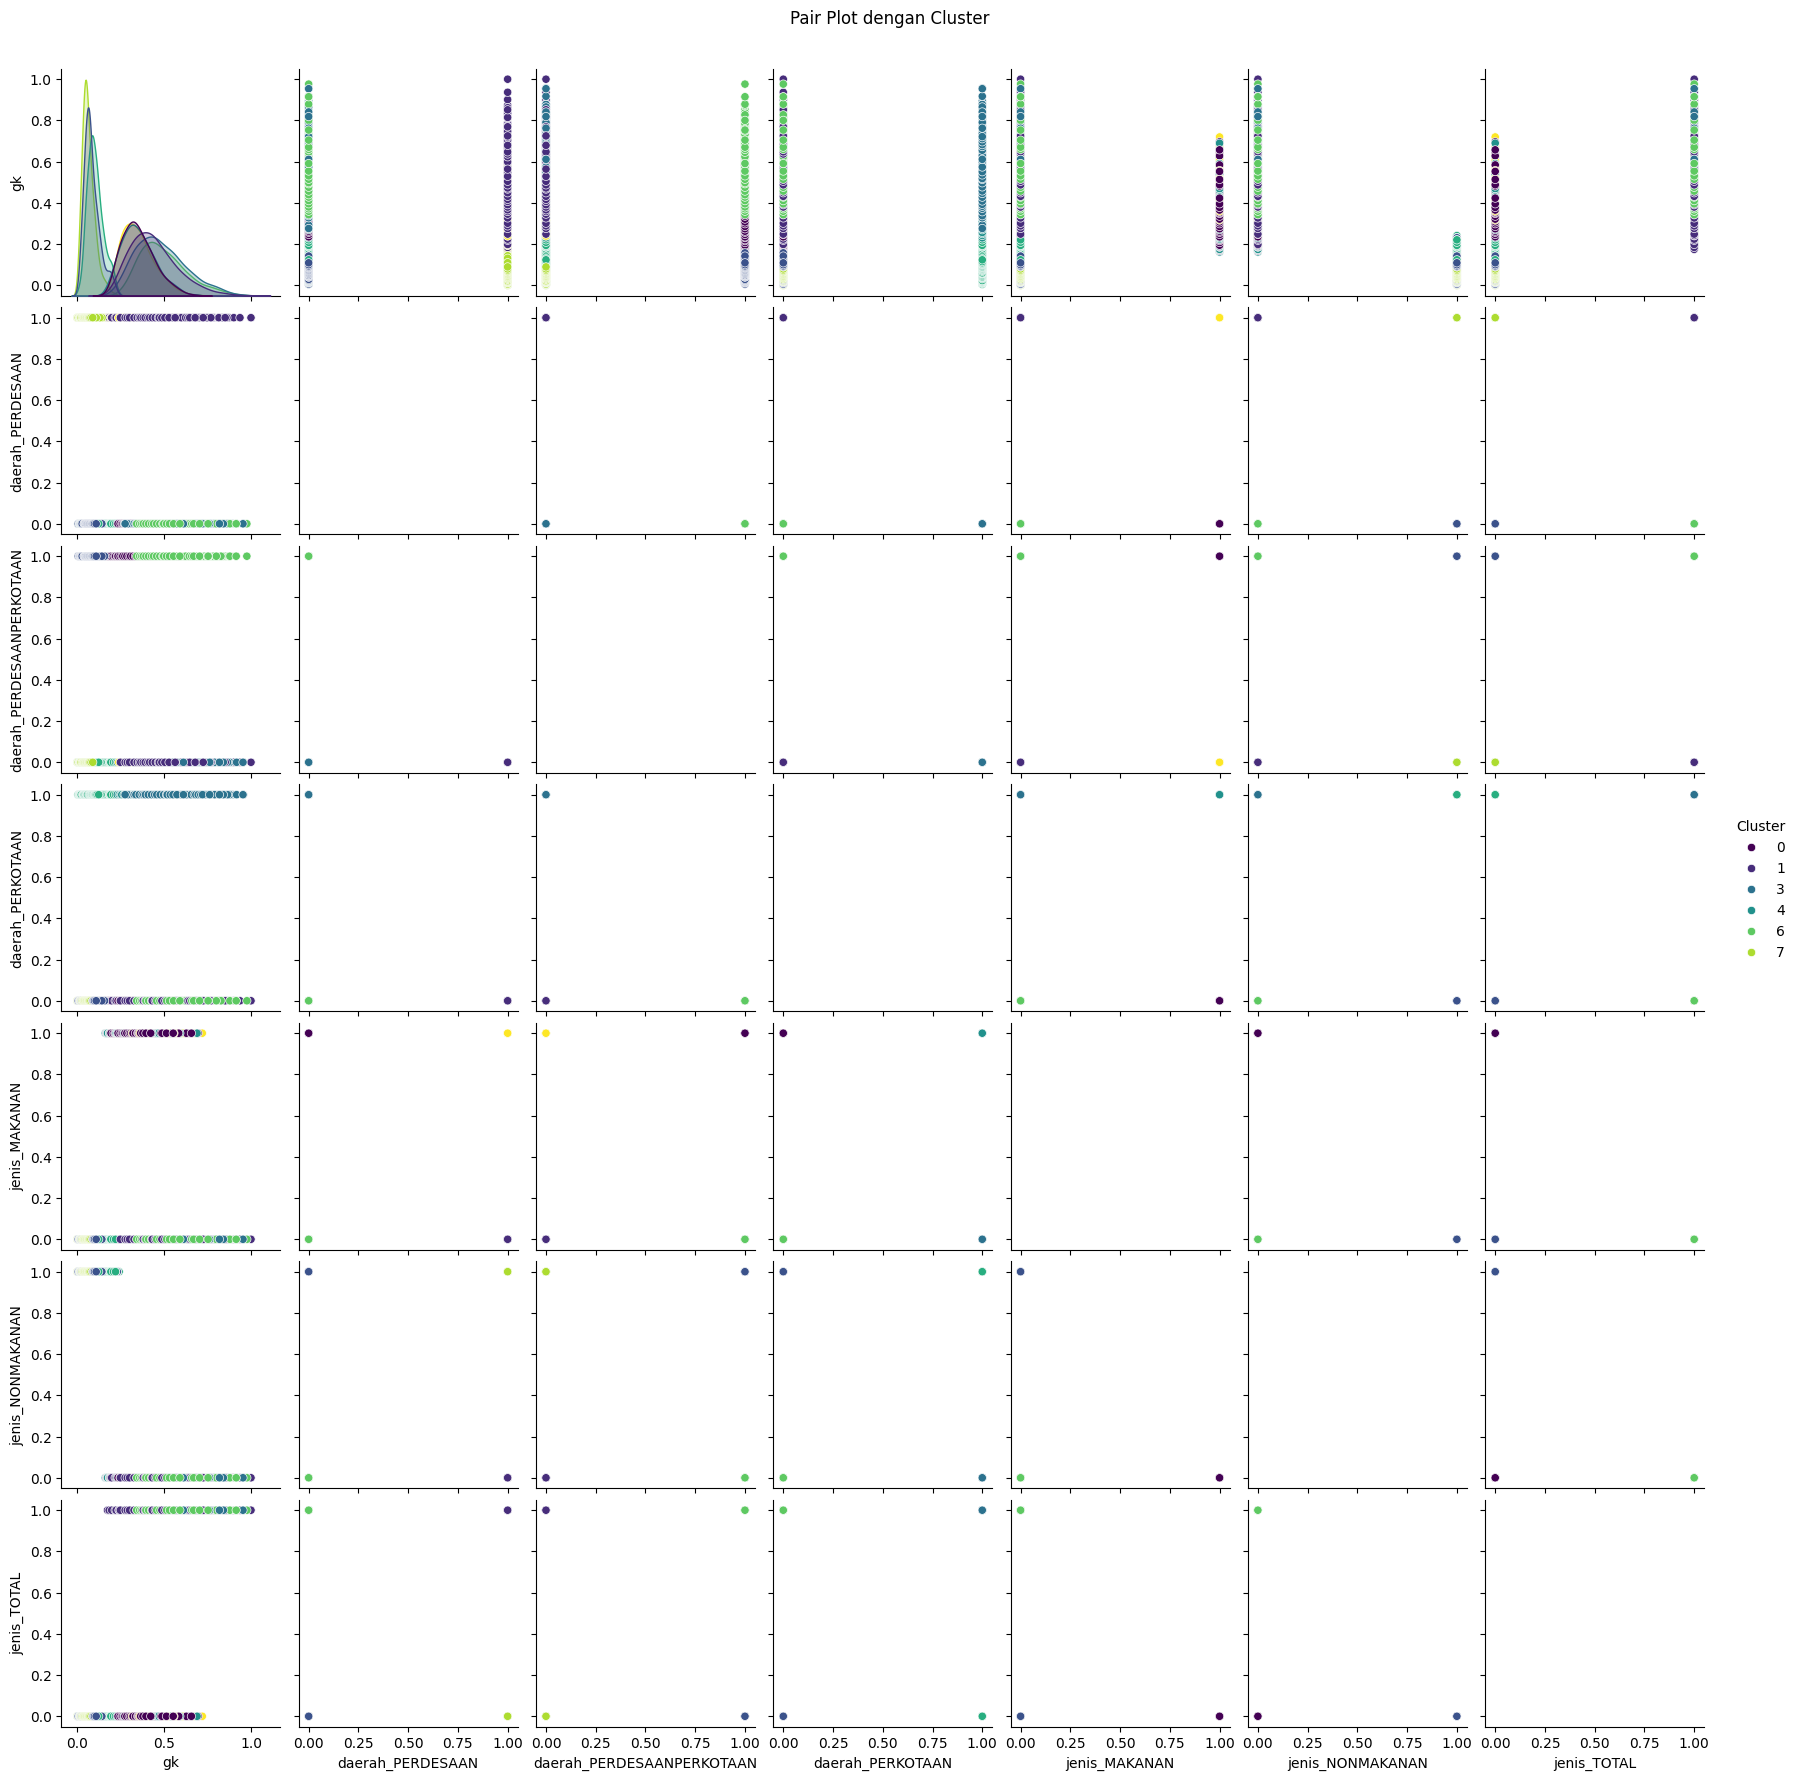

In [ ]:
# Pair plot
sns.pairplot(df_mm, hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot dengan Cluster', y=1.02)
plt.show()

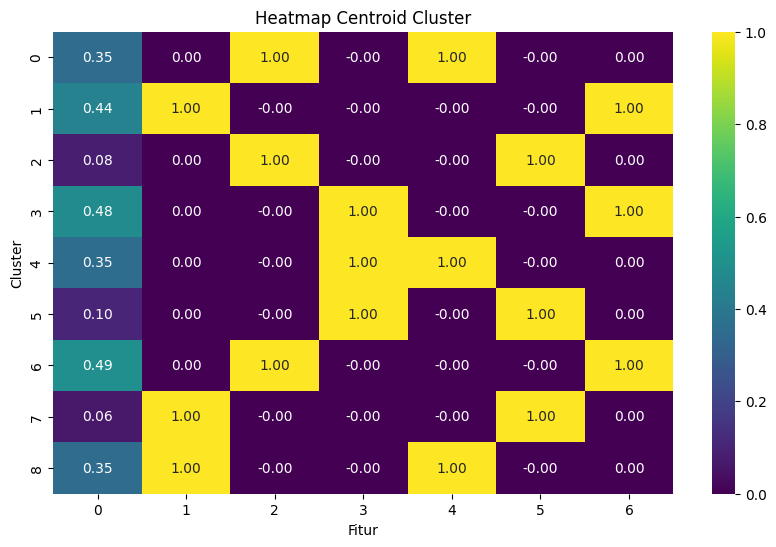

In [ ]:
# Hitung centroid cluster
centroids = kmeans.cluster_centers_

# Visualisasi heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(centroids, cmap='viridis', annot=True, fmt=".2f")
plt.title('Heatmap Centroid Cluster')
plt.xlabel('Fitur')
plt.ylabel('Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
df_mm[numeric_features] = rs.inverse_transform(df_mm[numeric_features])
df_mm

,gk,daerah_PERDESAAN,daerah_PERDESAANPERKOTAAN,daerah_PERKOTAAN,jenis_MAKANAN,jenis_NONMAKANAN,jenis_TOTAL,Cluster
0,392256.102659,0.0,0.0,1.0,1.0,0.0,0.0,4
1,394971.858352,0.0,0.0,1.0,1.0,0.0,0.0,4
2,396297.363592,0.0,0.0,1.0,1.0,0.0,0.0,4
3,400653.975588,0.0,0.0,1.0,1.0,0.0,0.0,4
4,393474.343441,1.0,0.0,0.0,1.0,0.0,0.0,8
...,...,...,...,...,...,...,...,...
5455,462951.755508,1.0,0.0,0.0,0.0,0.0,1.0,1
5456,449859.371434,0.0,1.0,0.0,0.0,0.0,1.0,6
5457,454253.993058,0.0,1.0,0.0,0.0,0.0,1.0,6
5458,460470.822008,0.0,1.0,0.0,0.0,0.0,1.0,6


In [ ]:
# mengesktrak one-hot yg sudah di encode
df_ohe_extracted = df_mm[ohe_columns]

# invers untuk mengembalikan nilai
inverse_categories = onhe.inverse_transform(df_ohe_extracted)

# Buat lagi dataframe
df_inverse = pd.DataFrame(inverse_categories, columns=categorical_cols, index=df_mm.index)

# Hapus kolom one-hot encoding dan gabungkan dengan data kategori asli
df_final = df_mm.drop(columns=ohe_columns)
df_final = pd.concat([df_final, df_inverse], axis=1)
df_final

,gk,Cluster,daerah,jenis
0,392256.102659,4,PERKOTAAN,MAKANAN
1,394971.858352,4,PERKOTAAN,MAKANAN
2,396297.363592,4,PERKOTAAN,MAKANAN
3,400653.975588,4,PERKOTAAN,MAKANAN
4,393474.343441,8,PERDESAAN,MAKANAN
...,...,...,...,...
5455,462951.755508,1,PERDESAAN,TOTAL
5456,449859.371434,6,PERDESAANPERKOTAAN,TOTAL
5457,454253.993058,6,PERDESAANPERKOTAAN,TOTAL
5458,460470.822008,6,PERDESAANPERKOTAAN,TOTAL


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

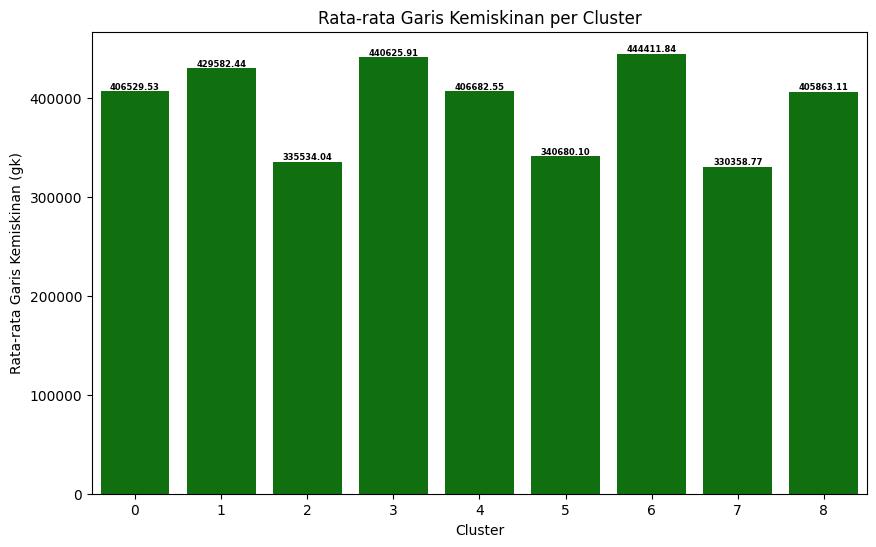

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung rata-rata gk per cluster
avg_gk_per_cluster = df_final.groupby("Cluster")["gk"].mean()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg_gk_per_cluster.index, y=avg_gk_per_cluster.values, color='green')


for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",   # Format angka dengan 2 desimal
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',  # Posisi teks di atas batang
                fontsize=6, color='black', fontweight='bold')

plt.xlabel("Cluster")
plt.ylabel("Rata-rata Garis Kemiskinan (gk)")
plt.title("Rata-rata Garis Kemiskinan per Cluster")
plt.xticks(rotation=0)


plt.show()

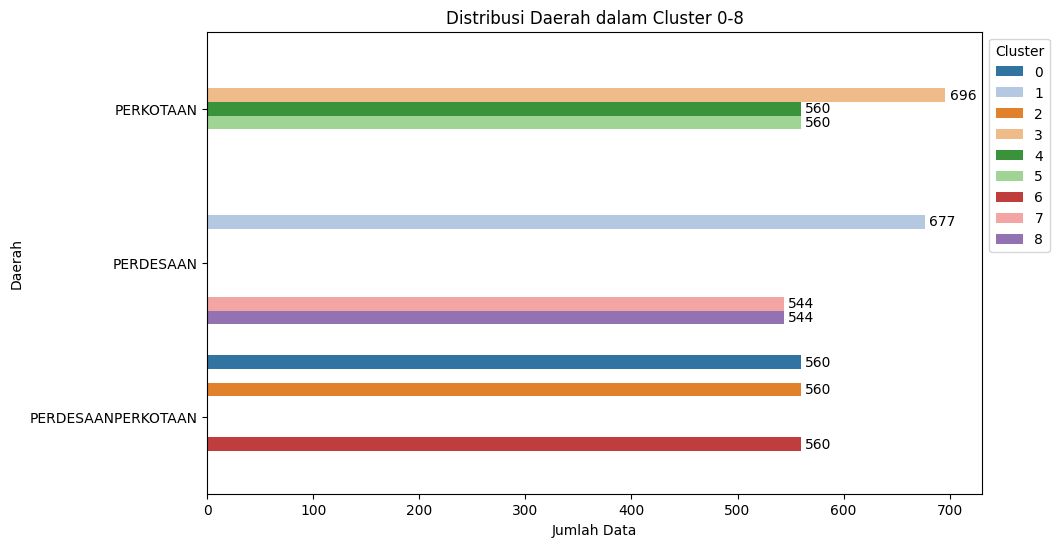

,daerah,Cluster,count
0,PERDESAAN,1,677
1,PERDESAAN,7,544
2,PERDESAAN,8,544
3,PERDESAANPERKOTAAN,0,560
4,PERDESAANPERKOTAAN,2,560
5,PERDESAANPERKOTAAN,6,560
6,PERKOTAAN,3,696
7,PERKOTAAN,4,560
8,PERKOTAAN,5,560


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Filter hanya Cluster 0-8
df_cluster_8 = df_final[df_final["Cluster"].isin(range(9))]


ax = sns.countplot(data=df_cluster_8, y="daerah", hue="Cluster", palette="tab20")


for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Tambahkan label dan judul
plt.xlabel("Jumlah Data")
plt.ylabel("Daerah")
plt.title("Distribusi Daerah dalam Cluster 0-8")


plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc="upper left")

plt.show()


verification_df = df_final.groupby(['daerah', 'Cluster']).size().reset_index(name='count')


verification_df = verification_df.sort_values(['daerah', 'Cluster'])

verification_df

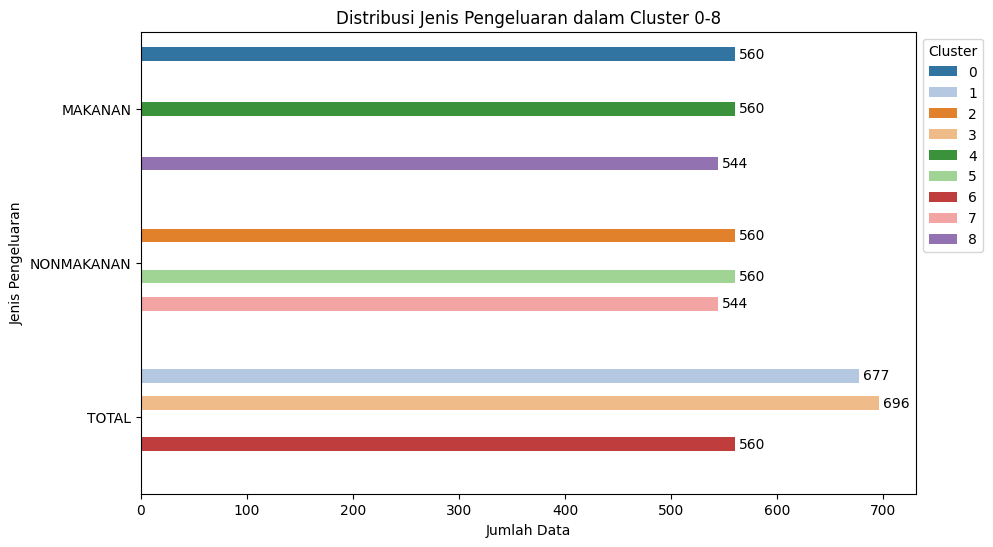

,jenis,Cluster,count
0,MAKANAN,0,560
1,MAKANAN,4,560
2,MAKANAN,8,544
3,NONMAKANAN,2,560
4,NONMAKANAN,5,560
5,NONMAKANAN,7,544
6,TOTAL,1,677
7,TOTAL,3,696
8,TOTAL,6,560


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Filter hanya Cluster 0-8
df_jenis_clustered = df_final[df_final["Cluster"].isin(range(9))]

# Buat countplot
ax = sns.countplot(data=df_jenis_clustered, y="jenis", hue="Cluster", palette="tab20")

# Tambahkan label angka di ujung batang
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Tambahkan label dan judul
plt.xlabel("Jumlah Data")
plt.ylabel("Jenis Pengeluaran")
plt.title("Distribusi Jenis Pengeluaran dalam Cluster 0-8")

# Tampilkan legenda di luar agar lebih rapi
plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc="upper left")

plt.show()

# Get value counts for each jenis-cluster combination
verification_df = df_final.groupby(['jenis', 'Cluster']).size().reset_index(name='count')

# Sort for better readability
verification_df = verification_df.sort_values(['jenis', 'Cluster'])

verification_df



---

# Analisis Karakteristik Cluster dari Model KMeans  


## **Cluster 1 (Label 0):**  
- **Rata-rata Garis Kemiskinan (gk):** 406.529,53  
- **Karakteristik Daerah:** Gabungan Perdesaan dan Perkotaan (560 daerah)  
- **Jenis Pengeluaran:** Total (makanan + non-makanan)  

**Analisis:**  
Cluster ini memiliki tingkat kemiskinan menengah dengan garis kemiskinan rata-rata **Rp406.529,53**. Cakupan daerah yang meliputi **perdesaan dan perkotaan** menunjukkan bahwa kemiskinan di cluster ini tidak spesifik pada satu tipe wilayah. Seluruh data dalam cluster terkait dengan **pengeluaran total**, yang mencakup kebutuhan dasar makanan dan non-makanan.  

**Rekomendasi Kebijakan:**  
- Program bantuan sosial yang mencakup kedua jenis pengeluaran (makanan dan non-makanan).  
- Intervensi kebijakan yang disesuaikan dengan karakteristik gabungan perdesaan-perkotaan, seperti peningkatan akses pasar dan layanan dasar.  

---

## **Cluster 2 (Label 1):**  
- **Rata-rata Garis Kemiskinan (gk):** 429.582,44  
- **Karakteristik Daerah:** Perdesaan (677 daerah)  
- **Jenis Pengeluaran:** Total  

**Analisis:**  
Cluster ini memiliki **tingkat kemiskinan tertinggi kedua** (Rp429.582,44) dan seluruh anggotanya berasal dari **daerah perdesaan**. Ketergantungan pada pengeluaran total menunjukkan bahwa kemiskinan di sini dipengaruhi oleh faktor multidimensi, seperti akses terbatas terhadap sumber daya ekonomi dan infrastruktur.  

**Rekomendasi Kebijakan:**  
- Program penguatan sektor pertanian dan diversifikasi ekonomi pedesaan.  
- Peningkatan infrastruktur dasar (jalan, listrik, air bersih) untuk mendukung aktivitas ekonomi.  

---

## **Cluster 3 (Label 2):**  
- **Rata-rata Garis Kemiskinan (gk):** 335.534,04  
- **Karakteristik Daerah:** Gabungan Perdesaan dan Perkotaan (560 daerah)  
- **Jenis Pengeluaran:** Non-Makanan  

**Analisis:**  
Cluster ini memiliki **garis kemiskinan terendah kedua** (Rp335.534,04), dengan fokus pada pengeluaran non-makanan (perumahan, transportasi, kesehatan). Kemungkinan, masyarakat di cluster ini telah memiliki akses yang lebih baik terhadap kebutuhan pangan.  

**Rekomendasi Kebijakan:**  
- Perbaikan kualitas layanan non-makanan (perumahan terjangkau, transportasi umum, fasilitas kesehatan).  
- Subsidi atau insentif untuk mengurangi beban pengeluaran non-makanan.  

---

## **Cluster 4 (Label 3):**  
- **Rata-rata Garis Kemiskinan (gk):** 440.652,91  
- **Karakteristik Daerah:** Perkotaan (696 daerah)  
- **Jenis Pengeluaran:** Total  

**Analisis:**  
Cluster ini menempati **posisi kedua tertinggi** dalam garis kemiskinan (Rp440.652,91), dengan seluruh anggota berasal dari **perkotaan**. Tingginya biaya hidup dan ketimpangan sosial di perkotaan mungkin menjadi penyebab utamanya.  

**Rekomendasi Kebijakan:**  
- Program perumahan sosial dan bantuan tunai untuk keluarga berpenghasilan rendah.  
- Pelatihan keterampilan untuk menciptakan lapangan kerja berkelanjutan.  

---

## **Cluster 5 (Label 4):**  
- **Rata-rata Garis Kemiskinan (gk):** 406.682,55  
- **Karakteristik Daerah:** Perkotaan (560 daerah)  
- **Jenis Pengeluaran:** Makanan  

**Analisis:**  
Cluster ini memiliki tingkat kemiskinan menengah (Rp406.682,55) dengan fokus pada **pengeluaran makanan**. Hal ini mengindikasikan bahwa harga pangan yang tinggi atau ketergantungan pada sektor informal menjadi tantangan utama.  

**Rekomendasi Kebijakan:**  
- Subsidi harga bahan pokok dan program bantuan pangan.  
- Peningkatan akses ke pasar tradisional yang terjangkau.  

---

## **Cluster 6 (Label 5):**  
- **Rata-rata Garis Kemiskinan (gk):** 340.680,10  
- **Karakteristik Daerah:** Gabungan Perdesaan dan Perkotaan (560 daerah)  
- **Jenis Pengeluaran:** Non-Makanan  

**Analisis:**  
Mirip dengan Cluster 3, cluster ini memiliki garis kemiskinan rendah (Rp340.680,10) dengan fokus pada pengeluaran non-makanan. Perbedaan utama adalah nilai garis kemiskinan yang sedikit lebih tinggi.  

**Rekomendasi Kebijakan:**  
- Fokus pada peningkatan kualitas infrastruktur dan layanan publik.  

---

## **Cluster 7 (Label 6):**  
- **Rata-rata Garis Kemiskinan (gk):** 444.411,84  
- **Karakteristik Daerah:** Gabungan Perdesaan dan Perkotaan (560 daerah)  
- **Jenis Pengeluaran:** Total  

**Analisis:**  
**Cluster dengan garis kemiskinan tertinggi** (Rp444.411,84), menunjukkan masalah kemiskinan multidimensi di kedua tipe wilayah.  

**Rekomendasi Kebijakan:**  
- Program bantuan sosial komprehensif yang mencakup makanan, perumahan, dan kesehatan.  
- Investasi dalam infrastruktur untuk mendukung pertumbuhan ekonomi.  

---

## **Cluster 8 (Label 7):**  
- **Rata-rata Garis Kemiskinan (gk):** 330.358,77  
- **Karakteristik Daerah:** Perdesaan (544 daerah)  
- **Jenis Pengeluaran:** Non-Makanan  

**Analisis:**  
**Garis kemiskinan terendah** (Rp330.358,77) dengan fokus pada pengeluaran non-makanan di perdesaan. Masyarakat mungkin telah mencapai ketahanan pangan tetapi membutuhkan dukungan di sektor lain.  

**Rekomendasi Kebijakan:**  
- Penguatan layanan kesehatan dan pendidikan di perdesaan.  
- Program pengembangan UMKM untuk diversifikasi pendapatan.  

---

## **Cluster 9 (Label 8):**  
- **Rata-rata Garis Kemiskinan (gk):** 405.863,11  
- **Karakteristik Daerah:** Perdesaan (544 daerah)  
- **Jenis Pengeluaran:** Makanan  

**Analisis:**  
Tingkat kemiskinan menengah (Rp405.863,11) dengan ketergantungan pada pengeluaran makanan, menunjukkan kerentanan terhadap fluktuasi harga pangan.  

**Rekomendasi Kebijakan:**  
- Program stabilisasi harga pangan dan bantuan langsung untuk petani.  
- Pengembangan lumbung pangan masyarakat.  

---

## **Kesimpulan Umum:**  
1. **Cluster dengan Kemiskinan Tinggi** (4, 7, 2):  
   - Perlu intervensi multidimensi, termasuk bantuan sosial, penciptaan lapangan kerja, dan perbaikan infrastruktur.  
2. **Cluster dengan Kemiskinan Rendah** (3, 6, 8):  
   - Fokus pada peningkatan kualitas layanan non-makanan dan diversifikasi ekonomi.  
3. **Perbedaan Urban-Rural:**  
   - Perkotaan: Tantangan utama adalah biaya hidup tinggi dan ketimpangan.  
   - Perdesaan: Ketergantungan pada sektor pertanian dan akses terbatas ke layanan dasar.  

**Rekomendasi Kebijakan Holistik:**  
- **Daerah Perkotaan:** Program perumahan terjangkau dan pelatihan keterampilan.  
- **Daerah Perdesaan:** Penguatan infrastruktur dan diversifikasi ekonomi non-pertanian.  
- **Gabungan Perdesaan-Perkotaan:** Pendekatan kebijakan yang fleksibel sesuai karakteristik lokal.  

Dengan memahami karakteristik unik setiap cluster, pemerintah dapat merancang intervensi yang lebih tepat sasaran dan efektif dalam mengurangi kemiskinan.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df_final.to_csv('garisKemiskinan_labeled.csv', index=False)
df_final

,gk,Cluster,daerah,jenis
0,392256.102659,4,PERKOTAAN,MAKANAN
1,394971.858352,4,PERKOTAAN,MAKANAN
2,396297.363592,4,PERKOTAAN,MAKANAN
3,400653.975588,4,PERKOTAAN,MAKANAN
4,393474.343441,8,PERDESAAN,MAKANAN
...,...,...,...,...
5455,462951.755508,1,PERDESAAN,TOTAL
5456,449859.371434,6,PERDESAANPERKOTAAN,TOTAL
5457,454253.993058,6,PERDESAANPERKOTAAN,TOTAL
5458,460470.822008,6,PERDESAANPERKOTAAN,TOTAL
